In [ ]:
!pip install stellargraph

     |████████████████████████████████| 440kB 3.4MB/s 


In [ ]:
#url = '/content/drive/My Drive/Colab Notebooks/stellargraph/Data/graph.csv'
#url1 = 'https://raw.githubusercontent.com/asifabdullah-git/StellarGraph/master/Data/graph_final.csv'
#url2 = 'https://raw.githubusercontent.com/asifabdullah-git/StellarGraph/master/Data/nodes.csv'

url1 = 'https://raw.githubusercontent.com/asifabdullah-git/StellarGraph/master/Data/network_graph/datasets_2738_4529_stack_network_links.csv'
url2 = 'https://raw.githubusercontent.com/asifabdullah-git/StellarGraph/master/Data/network_graph/datasets_2738_4529_stack_network_nodes.csv'

In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#import stellargraph as sg
import tensorflow as tf
import networkx as nx

In [ ]:
G = nx.Graph(day="Stackoverflow")

In [ ]:
df_nodes = pd.read_csv(url2, encoding='utf-8')
df_edges = pd.read_csv(url1, encoding='utf-8')

In [ ]:
df_nodes

,name,group,nodesize
0,html,6,272.45
1,css,6,341.17
2,hibernate,8,29.83
3,spring,8,52.84
4,ruby,3,70.14
...,...,...,...
110,perl,13,19.38
111,cloud,9,10.66
112,photoshop,6,12.62
113,powershell,5,9.85


In [ ]:
#First, find out all the features with type object in the data:

objList = df_nodes.select_dtypes(include = "object").columns
print (objList)

Index(['name'], dtype='object')


In [ ]:
#First, find out all the features with type object in the data:

objList1 = df_edges.select_dtypes(include = "object").columns
print (objList1)

Index(['source', 'target'], dtype='object')


In [ ]:
#Label Encoding for object to numeric conversion

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df_nodes[feat] = le.fit_transform(df_nodes[feat].astype(str))

print (df_nodes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      115 non-null    int64  
 1   group     115 non-null    int64  
 2   nodesize  115 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 2.8 KB
None


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList1:
    df_edges[feat] = le.fit_transform(df_edges[feat].astype(str))

print (df_edges.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  490 non-null    int64  
 1   target  490 non-null    int64  
 2   value   490 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 11.6 KB
None


In [ ]:
df_edges.sort_values(by=['source'])


,source,target,value
426,0,93,32.322524
262,0,55,20.501744
86,0,18,62.167895
483,0,111,32.350925
66,0,14,20.933192
...,...,...,...
312,113,65,43.418825
195,113,45,34.712865
193,113,44,46.365091
432,113,94,48.620335


In [ ]:
labels = df_nodes['group']
labels

0       6
1       6
2       8
3       8
4       3
       ..
110    13
111     9
112     6
113     5
114     1
Name: group, Length: 115, dtype: int64

In [ ]:
df_nodes.sort_values(by=['group'])

,name,group,nodesize
114,58,1,27.21
82,57,1,44.21
10,19,1,268.11
46,74,1,438.67
58,34,1,9.39
...,...,...,...
109,81,13,9.46
110,68,13,19.38
36,32,14,11.38
47,104,14,16.87


In [ ]:
for index, row in df_nodes.iterrows():
    G.add_node(row['name'], group=row['group'], nodesize=row['nodesize'])

In [ ]:
for index, row in df_edges.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['value'])])

In [ ]:
'''for index, row in df_edges.iterrows():
    G.add_weighted_edges_from([(row['Edge1'], row['Edge2'], row['Weight'])])'''

"for index, row in df_edges.iterrows():\n    G.add_weighted_edges_from([(row['Edge1'], row['Edge2'], row['Weight'])])"

In [ ]:
#obtain the adjacency matrix (A)
A = nx.adjacency_matrix(G)
print('Graph info: ', nx.info(G))

#Inspect the node features
print('\nGraph Nodes: ', G.nodes.data())

Graph info:  Name: 
Type: Graph
Number of nodes: 115
Number of edges: 245
Average degree:   4.2609

Graph Nodes:  [(41.0, {'group': 6.0, 'nodesize': 272.45}), (22.0, {'group': 6.0, 'nodesize': 341.17}), (40.0, {'group': 8.0, 'nodesize': 29.83}), (89.0, {'group': 8.0, 'nodesize': 52.84}), (83.0, {'group': 3.0, 'nodesize': 70.14}), (84.0, {'group': 3.0, 'nodesize': 55.31}), (44.0, {'group': 4.0, 'nodesize': 87.46}), (94.0, {'group': 4.0, 'nodesize': 63.62}), (42.0, {'group': 6.0, 'nodesize': 140.18}), (17.0, {'group': 1.0, 'nodesize': 189.83}), (19.0, {'group': 1.0, 'nodesize': 268.11}), (12.0, {'group': 2.0, 'nodesize': 129.55}), (18.0, {'group': 2.0, 'nodesize': 321.13}), (65.0, {'group': 4.0, 'nodesize': 47.01}), (48.0, {'group': 6.0, 'nodesize': 649.16}), (50.0, {'group': 6.0, 'nodesize': 208.29}), (80.0, {'group': 3.0, 'nodesize': 8.52}), (78.0, {'group': 3.0, 'nodesize': 59.03}), (70.0, {'group': 6.0, 'nodesize': 361.22}), (62.0, {'group': 6.0, 'nodesize': 165.43}), (91.0, {'group'

In [ ]:
color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
             13:'#d6dcff', 14:'#d2f5f0'}


In [ ]:
colors = [color_map[G.nodes[node]['group']] for node in G]
sizes = [G.nodes[node]['nodesize']*10 for node in G]

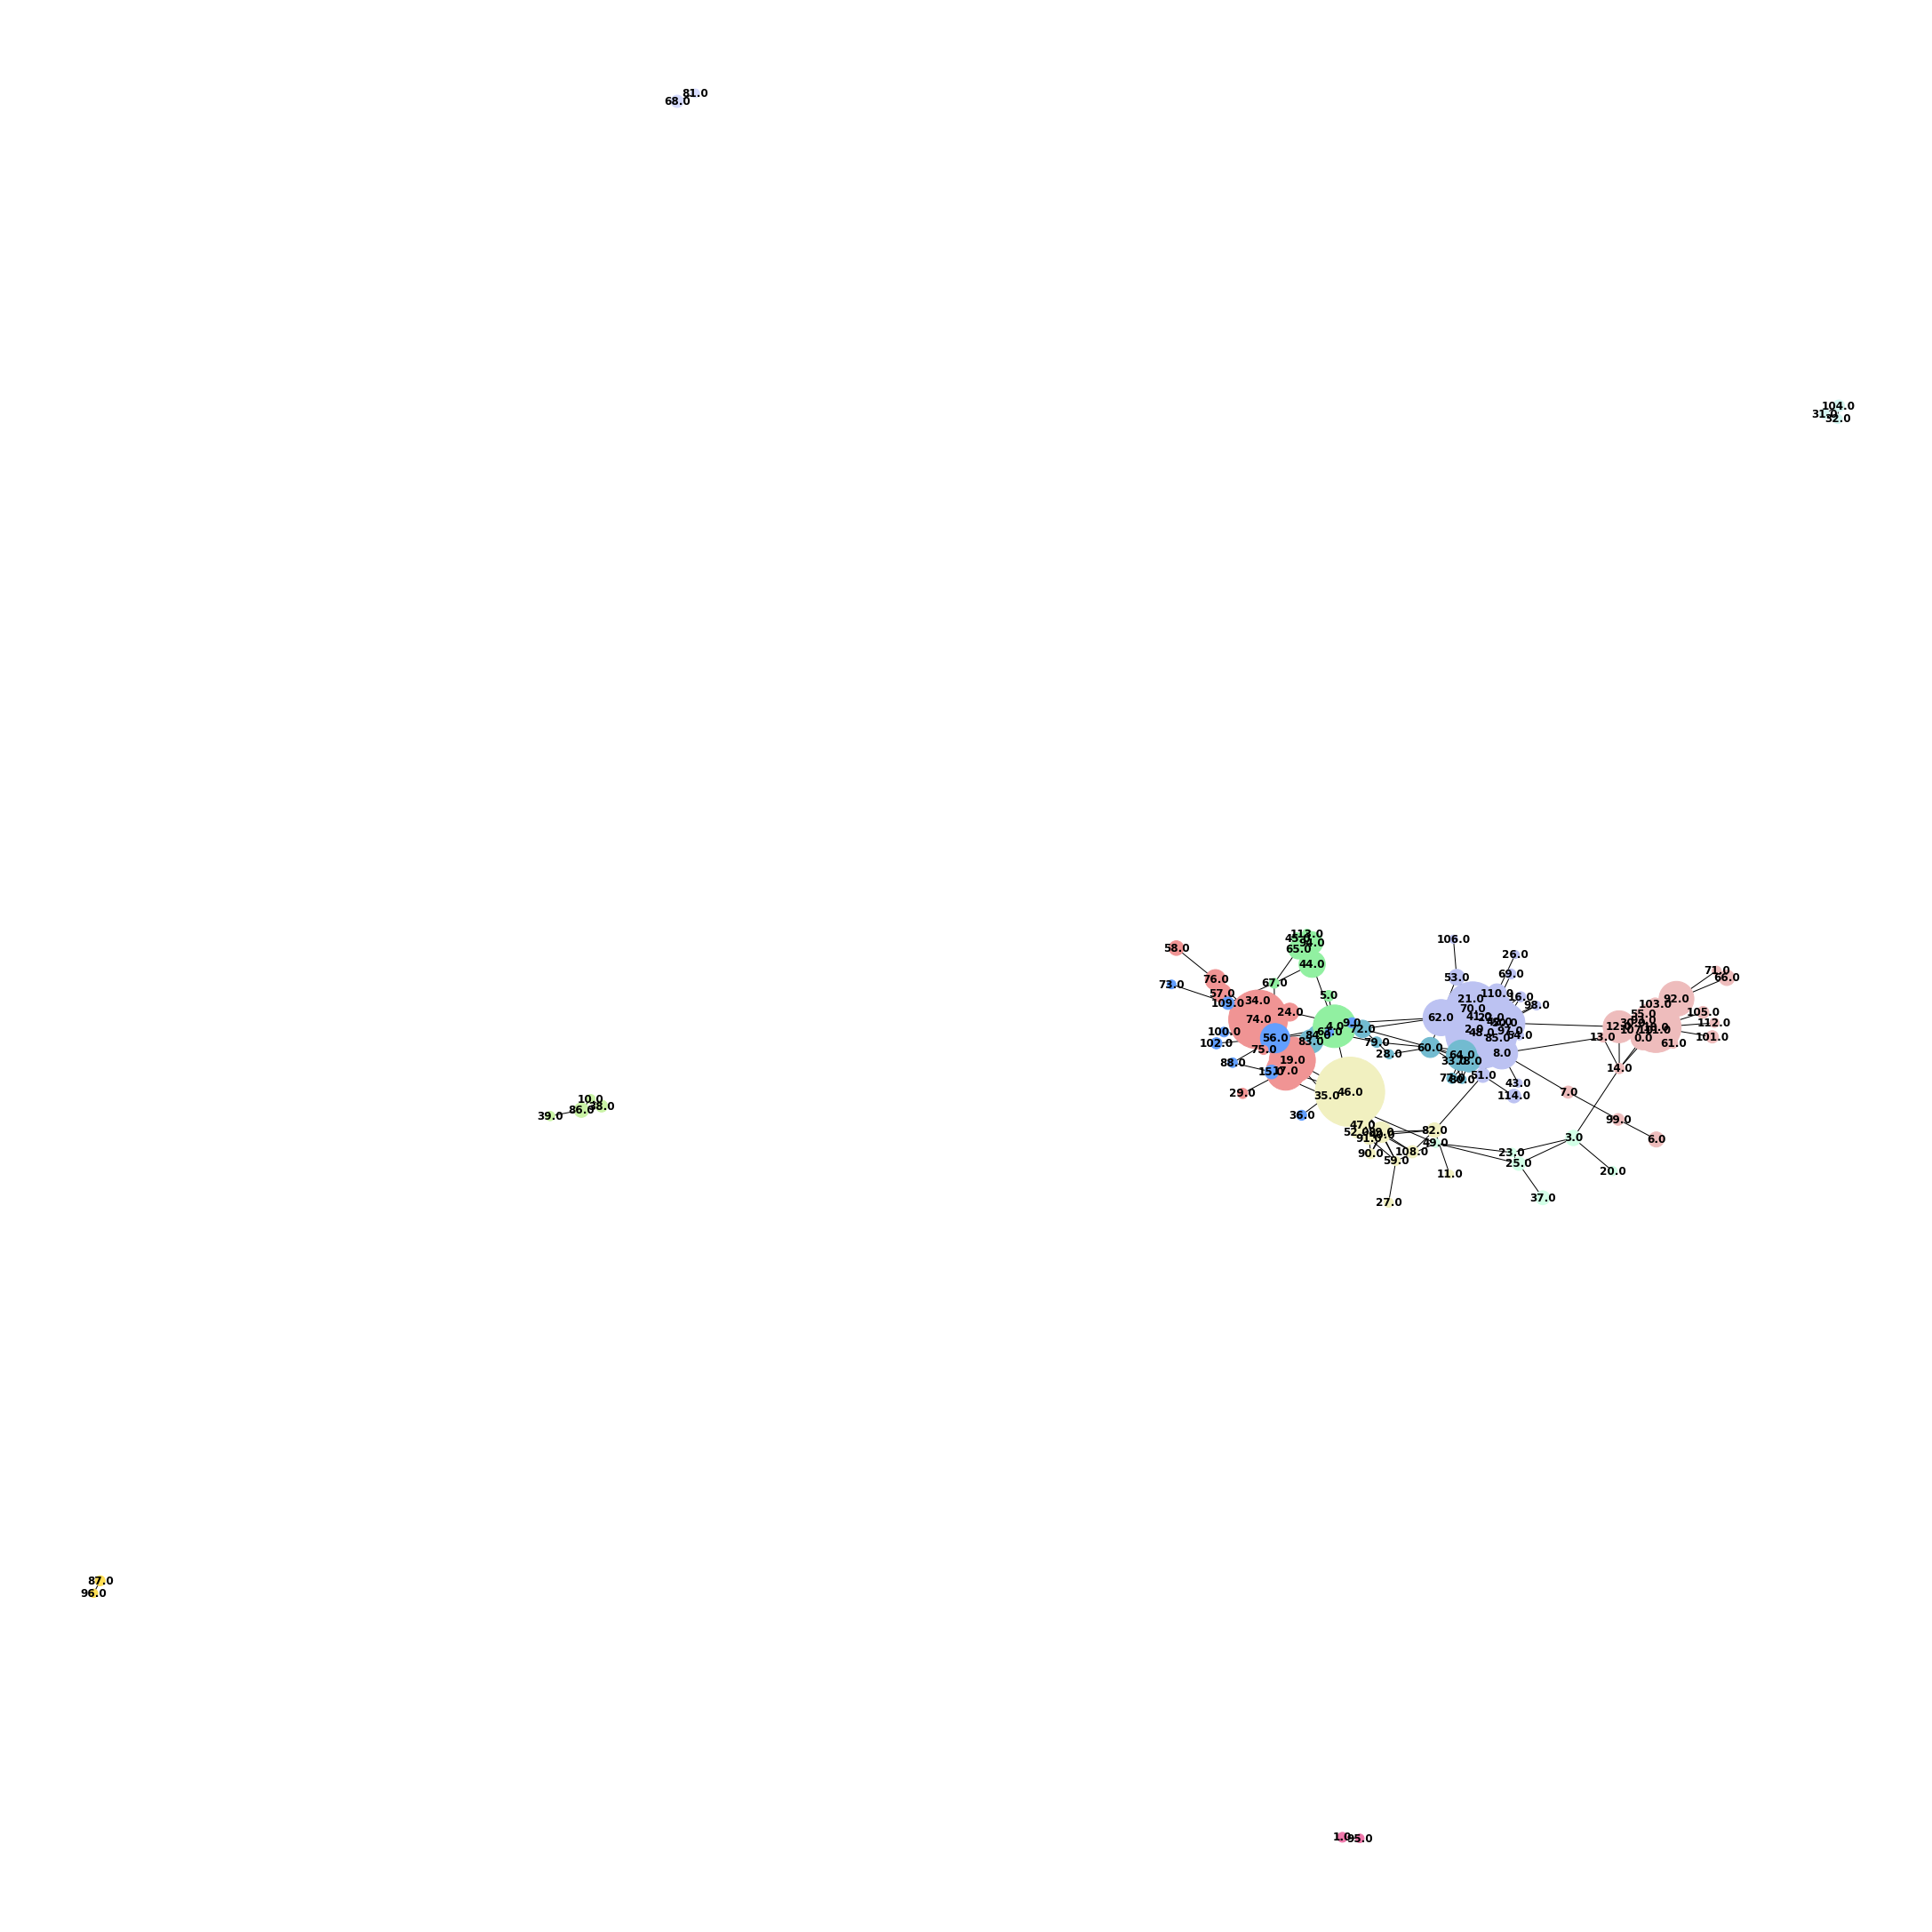

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (30,30)

nx.draw(G, node_color=colors, node_size=sizes, with_labels=True, font_weight='bold')
plt.show()

# Adjacency Matrix (A) and Node Features Matrix (X)

In [ ]:
#Get the Adjacency Matrix (A) and Node Features Matrix (X) as numpy array
A = np.array(nx.attr_matrix(G, node_attr='group')[0])
X = np.array(nx.attr_matrix(G, node_attr='group')[1])
X = np.expand_dims(X,axis=1)

print('Shape of A: ', A.shape)
print('\nShape of X: ', X.shape)
print('\nAdjacency Matrix (A):\n', A)
print('\nNode Features Matrix (X):\n', X)

Shape of A:  (14, 14)

Shape of X:  (14, 1)

Adjacency Matrix (A):
 [[12.  0.  1.  0.  1.  0.  0.  2.  0.  0.  0.  0.  0.  0.]
 [ 0. 49.  0.  0.  0.  2.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 1.  0. 20.  0.  1.  9.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 14.  2.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  2. 13.  1.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  2.  9.  0.  1. 66.  1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  2.  0.  0.  0.  0.  0.  0.  0.]
 [ 2.  0.  0.  1.  0.  1.  0. 27.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  1.  0.  0.  1.  7.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  4.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.]]

Node Features Matrix (X):
 [[ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]
 [11.]


# Converting the label to one-hot encoding

In [ ]:
from keras.utils import to_categorical

In [ ]:
def encode_label(labels):
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)
    labels = to_categorical(labels)
    return labels, label_encoder.classes_

labels_encoded, classes = encode_label(labels)

In [ ]:
classes

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [ ]:
labels_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# GCN

In [ ]:
!pip install dgl

     |████████████████████████████████| 3.5MB 3.4MB/s 


In [ ]:
!pip install spektral

     |████████████████████████████████| 102kB 3.1MB/s 


In [ ]:
import dgl
from dgl.nn.pytorch import GraphConv
from sklearn import preprocessing
from spektral.layers import GraphConv

DGL backend not selected or invalid.  Assuming PyTorch for now.
Using backend: pytorch


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


In [ ]:
# Parameters
channels = 16           # Number of channels in the first layer
dropout = 0.5           # Dropout rate for the features
l2_reg = 5e-4           # L2 regularization rate
learning_rate = 1e-2    # Learning rate
epochs = 200            # Number of training epochs
es_patience = 10        # Patience for early stopping

# Preprocessing operations
A = GraphConv.preprocess(A).astype('f4')

In [ ]:
F = df_nodes.iloc[:,1:3]
F = len(F. columns)

In [ ]:
N = G.nodes
N = len(N)

In [ ]:
num_classes = len(set(labels))
print('\nNumber of classes: ', num_classes)


Number of classes:  14


In [ ]:
import tensorflow as tf
import tensorflow 

from tensorflow import keras
from keras.layers import Dense
from tensorflow.python.keras.layers import Input, Dense
from keras.layers import Dropout
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [ ]:
# Model definition
X_in = Input(shape=(F, ))
fltr_in = Input((N, ), sparse=True)

dropout_1 = Dropout(dropout)(X_in)
graph_conv_1 = GraphConv(channels,
                         activation='relu',
                         kernel_regularizer=regularizers.l2(l2_reg),
                         use_bias=False)([dropout_1, fltr_in])

dropout_2 = Dropout(dropout)(graph_conv_1)
graph_conv_2 = GraphConv(num_classes,
                         activation='softmax',
                         use_bias=False)([dropout_2, fltr_in])


In [ ]:
import tensorflow.keras as keras

In [ ]:
# Build model
model = keras.Model(inputs=[X_in, fltr_in], outputs=graph_conv_2)
optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              weighted_metrics=['acc'])
model.summary()


Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 2)]          0                                            
__________________________________________________________________________________________________
dropout_6 (Dropout)             (None, 2)            0           input_12[0][0]                   
__________________________________________________________________________________________________
input_13 (InputLayer)           [(None, 115)]        0                                            
__________________________________________________________________________________________________
graph_conv_1 (GraphConv)        (None, 16)           32          dropout_6[0][0]                  
                                                                 input_13[0][0]        

# Train the Graph Convolutional Networks

In [ ]:
# Train model
#validation_data = ([X, A], labels_encoded, val_mask)
model.fit([X, A],
          labels_encoded,
          #sample_weight=train_mask,
          epochs=epochs,
          batch_size=N,
          #validation_data=validation_data,
          shuffle=False,
          callbacks=[
              EarlyStopping(patience=es_patience,  restore_best_weights=True),
    
          ])

NameError: ignored

# Draw the graph

In [ ]:
color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
             13:'#d6dcff', 14:'#d2f5f0'}


In [ ]:
from matplotlib.pyplot import figure
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

In [ ]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}

In [ ]:
colors = [color_map[G.nodes[node]['group']] for node in G]
sizes = [G.nodes[node]['nodesize']*10 for node in G]

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (50,80)

nx.draw(G, node_color=colors, node_size=sizes, with_labels=True, font_weight='bold')
plt.show()

In [ ]:
nx.draw(G, node_color=colors, node_size=sizes, pos=nx.spring_layout(G, k=0.25, iterations=10), **options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555") 
plt.show()

In [ ]:
df1 = pd.read_csv(url1, encoding='utf-8')

In [ ]:
Graphtype = nx.Graph()

In [ ]:
G = nx.parse_edgelist(df1, delimiter=',', create_using=Graphtype,
                      nodetype=int, data=(('weight', float),))

In [ ]:
G.number_of_nodes

In [ ]:

G = nx.Graph()

In [ ]:
G.add_nodes_from(df1)

In [ ]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])

In [ ]:
FG

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
G = nx.petersen_graph()
plt.subplot(121)

nx.draw(G, with_labels=True, font_weight='bold')


In [ ]:
plt.subplot(122)

nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

In [ ]:
df1.head()

In [ ]:
#First, find out all the features with type object in the data:

objList = df1.select_dtypes(include = "object").columns
print (objList)

In [ ]:
#Label Encoding for object to numeric conversion

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df1[feat] = le.fit_transform(df1[feat].astype(str))

print (df1.info())

In [ ]:
from mlxtend.preprocessing import one_hot
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [ ]:
X = df1.iloc[:,0:3]

In [ ]:
arr = X.to_numpy()

In [ ]:
OHE = OneHotEncoder()

In [ ]:
y = OHE.fit(arr)